In [1]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [38]:
N = 200
x_start, x_end = -4.0, 20.0
y_start, y_end = -5.0, 5.0
x = numpy.linspace(x_start, x_end, N)
y = numpy.linspace(y_start, y_end, N)
X, Y = numpy.meshgrid(x, y)

In [39]:
numpy.shape(X)

(200, 200)

In [40]:
u_inf = 1.0
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)
psi_freestream = u_inf * Y

In [41]:
def get_velocity(strength, xs, ys, X, Y):
    u = strength / (2 * numpy.pi) * (X - xs) / ((X - xs)**2 + ((Y - ys)**2))
    v = strength / (2 * numpy.pi) * (Y - ys) / ((X - xs)**2 + ((Y - ys)**2))
    return u, v

In [42]:
def get_stream_function(strength, xs, ys, X, Y):
    psi = strength / (2 * numpy.pi) * numpy.arctan2((Y - ys), (X - xs))
    return psi

In [43]:
strength_source = 5.0
x_source, y_source = -1.0, 0.0

u_source, v_source = get_velocity(strength_source, x_source, y_source, X, Y)

psi_source = get_stream_function(strength_source, x_source, y_source, X, Y)

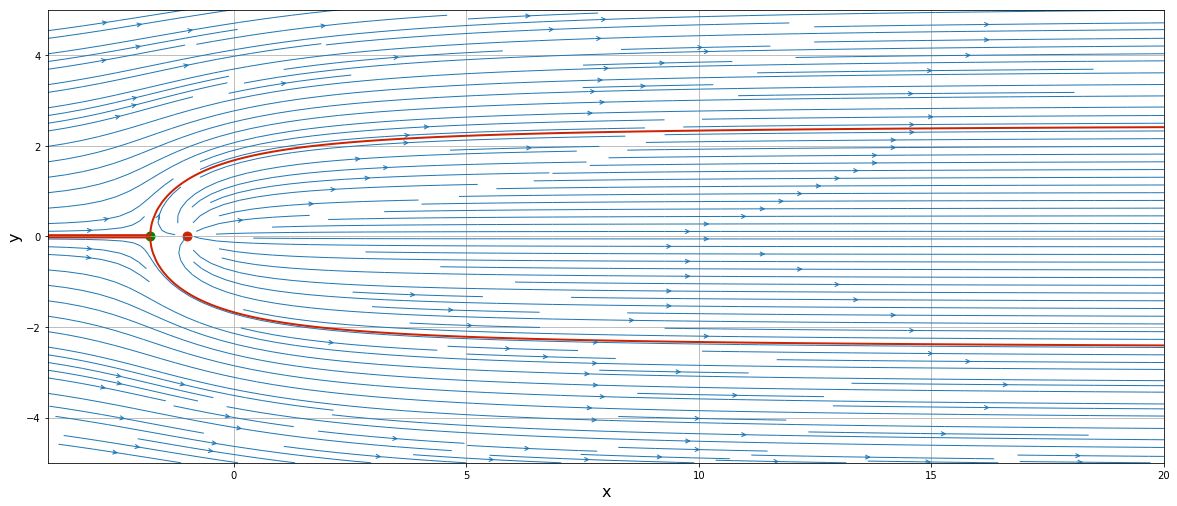

In [45]:
u = u_freestream + u_source
v = v_freestream + v_source
psi = psi_freestream + psi_source

width = 20
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_source, y_source, color='#CD2305', s=80, marker='o')

x_stagnation = x_source - strength_source / (2 * numpy.pi * u_inf)
y_stagnation = y_source

pyplot.scatter(x_stagnation, y_stagnation, color='g', s=80, marker='o')

pyplot.contour(X, Y, psi, levels=[-strength_source / 2, strength_source / 2], colors='#CD2305', linewidths=2,
              linestyles='solid');

In [48]:
width = strength_source / u_inf
